### Análisis de Tutelas
Proyecto: Análisis tutelar en temas de salud 1992 - 2019

Autor: Juan Sebastian Muñoz

Objetivo: .

Fecha de creación: Noviembre de 2019

In [183]:
import nltk                     #Para Análisis del texto
from nltk import word_tokenize  
from nltk.corpus import stopwords
from collections import Counter
import collections
import string
import numpy as np              #Para el uso y manejo de datos
import timeit                   #Para calcular tiempos de ejecución del código
import re                       #Para uso de expresiones regulares
import matplotlib.pyplot as plt #Para realizar los gráficos
import requests                 #Para hacer las solicitudes del codigo fuente de las páginas
from bs4 import BeautifulSoup   #Para transformar el código extraído a formato para poder ser usado en Python
import pandas as pd             #Decarga de pandas para uso de bases de datos
plt.rcParams["figure.figsize"] = [18.0, 8.0]

In [84]:
Tutelas = pd.read_pickle('DBTutelas.pkl')
Tutelas

,Item,Expediente,Año,Mes,Día,Link,Sentencia,Magistrado_Ponente,Demandante,Demandado,...,Tutela_no_punt,Demandado_no_punt,Fecha,Tutela_tkn,Demandado_tkn,Tutela_nsw,Demandado_nsw,Tutela_text,Demandado_text,Respuesta
0,1,2130,1992,8,11,http://www.corteconstitucional.gov.co//relator...,T-484/92,FABIO MORÓN DÍAZ,ALONSO MUÑOZ,,...,derecho a la salud derecho a la vida sida iss...,,1992-08-11,"[derecho, a, la, salud, derecho, a, la, vida, ...",[],"[derecho, salud, derecho, vida, sida, iss, con...",[],"(derecho, salud, derecho, vida, sida, iss, con...",(),1
1,2,2047,1992,8,11,http://www.corteconstitucional.gov.co//relator...,T-487/92,ALEJANDRO MARTÍNEZ CABALLERO,DANILO MOLINA,,...,derecho a la salud libertad de locomocion lib...,,1992-08-11,"[derecho, a, la, salud, libertad, de, locomoci...",[],"[derecho, salud, libertad, locomocion, liberta...",[],"(derecho, salud, libertad, locomocion, liberta...",(),1
2,3,2193,1992,8,13,http://www.corteconstitucional.gov.co//relator...,T-491/92,EDUARDO CIFUENTES MUÑOZ,ROSALBA DUQUE,,...,derecho a la seguridad social derecho a la sa...,,1992-08-13,"[derecho, a, la, seguridad, social, derecho, a...",[],"[derecho, seguridad, social, derecho, salud, p...",[],"(derecho, seguridad, social, derecho, salud, p...",(),1
3,4,2359,1992,8,21,http://www.corteconstitucional.gov.co//relator...,T-499/92,EDUARDO CIFUENTES MUÑOZ,NERY CHIQUIZA,,...,derecho a la salud dignidad humana caprecom c...,,1992-08-21,"[derecho, a, la, salud, dignidad, humana, capr...",[],"[derecho, salud, dignidad, humana, caprecom, c...",[],"(derecho, salud, dignidad, humana, caprecom, c...",(),1
4,5,2535,1992,8,28,http://www.corteconstitucional.gov.co//relator...,T-505/92,EDUARDO CIFUENTES MUÑOZ,DIEGO SERNA,,...,servicio de salud derechos del enfermo sida c...,,1992-08-28,"[servicio, de, salud, derechos, del, enfermo, ...",[],"[servicio, salud, derechos, enfermo, sida, con...",[],"(servicio, salud, derechos, enfermo, sida, con...",(),1
5,6,2972,1992,9,19,http://www.corteconstitucional.gov.co//relator...,T-522/92,ALEJANDRO MARTÍNEZ CABALLERO,BALDOYNO ASPRILLA,,...,derechos de los internos derecho a la salud c...,,1992-09-19,"[derechos, de, los, internos, derecho, a, la, ...",[],"[derechos, internos, derecho, salud, concedida]",[],"(derechos, internos, derecho, salud, concedida)",(),1
6,7,2610,1992,9,23,http://www.corteconstitucional.gov.co//relator...,T-536/92,SIMON RODRIGUEZ RODRIGUEZ,OLINDA BARRAGAN Y OTRA,,...,derecho al ambiente sano derecho a la salud m...,,1992-09-23,"[derecho, al, ambiente, sano, derecho, a, la, ...",[],"[derecho, ambiente, sano, derecho, salud, medi...",[],"(derecho, ambiente, sano, derecho, salud, medi...",(),1
7,8,3115,1992,9,24,http://www.corteconstitucional.gov.co//relator...,T-534/92,CIRO ANGARITA BARON,JORGE A MORENO,,...,derecho a la salud servicio militar derecho a...,,1992-09-24,"[derecho, a, la, salud, servicio, militar, der...",[],"[derecho, salud, servicio, militar, derecho, s...",[],"(derecho, salud, servicio, militar, derecho, s...",(),1
8,9,3479,1992,10,2,http://www.corteconstitucional.gov.co//relator...,T-548/92,CIRO ANGARITA BARON,FELIX ROJAS,,...,derecho a la salud derechos de los pacientes ...,,1992-10-02,"[derecho, a, la, salud, derechos, de, los, pac...",[],"[derecho, salud, derechos, pacientes, iss, neg...",[],"(derecho, salud, derechos, pacientes, iss, neg...",(),-1
9,10,D-039,1992,10,20,http://www.corteconstitucional.gov.co//relator...,C-560/92,SIMON RODRIGUEZ RODRIGUEZ,ABDON ORTIZ,,...,dec 127290 arts 3 lit p y 7 lit ll reforma de...,,1992-10-20,"[dec, 127290, arts, 3, lit, p, y, 7, lit, ll, ...",[],"[dec, 127290, arts, 3, lit, p, 7, lit, ll, ref...",[],"(dec, 127290, arts, 3, lit, p, 7, lit, ll, ref...",(),12


In [85]:
#Número de tutelas disponibles
len(Tutelas)

5834

In [86]:
Tutelas

,Item,Expediente,Año,Mes,Día,Link,Sentencia,Magistrado_Ponente,Demandante,Demandado,...,Tutela_no_punt,Demandado_no_punt,Fecha,Tutela_tkn,Demandado_tkn,Tutela_nsw,Demandado_nsw,Tutela_text,Demandado_text,Respuesta
0,1,2130,1992,8,11,http://www.corteconstitucional.gov.co//relator...,T-484/92,FABIO MORÓN DÍAZ,ALONSO MUÑOZ,,...,derecho a la salud derecho a la vida sida iss...,,1992-08-11,"[derecho, a, la, salud, derecho, a, la, vida, ...",[],"[derecho, salud, derecho, vida, sida, iss, con...",[],"(derecho, salud, derecho, vida, sida, iss, con...",(),1
1,2,2047,1992,8,11,http://www.corteconstitucional.gov.co//relator...,T-487/92,ALEJANDRO MARTÍNEZ CABALLERO,DANILO MOLINA,,...,derecho a la salud libertad de locomocion lib...,,1992-08-11,"[derecho, a, la, salud, libertad, de, locomoci...",[],"[derecho, salud, libertad, locomocion, liberta...",[],"(derecho, salud, libertad, locomocion, liberta...",(),1
2,3,2193,1992,8,13,http://www.corteconstitucional.gov.co//relator...,T-491/92,EDUARDO CIFUENTES MUÑOZ,ROSALBA DUQUE,,...,derecho a la seguridad social derecho a la sa...,,1992-08-13,"[derecho, a, la, seguridad, social, derecho, a...",[],"[derecho, seguridad, social, derecho, salud, p...",[],"(derecho, seguridad, social, derecho, salud, p...",(),1
3,4,2359,1992,8,21,http://www.corteconstitucional.gov.co//relator...,T-499/92,EDUARDO CIFUENTES MUÑOZ,NERY CHIQUIZA,,...,derecho a la salud dignidad humana caprecom c...,,1992-08-21,"[derecho, a, la, salud, dignidad, humana, capr...",[],"[derecho, salud, dignidad, humana, caprecom, c...",[],"(derecho, salud, dignidad, humana, caprecom, c...",(),1
4,5,2535,1992,8,28,http://www.corteconstitucional.gov.co//relator...,T-505/92,EDUARDO CIFUENTES MUÑOZ,DIEGO SERNA,,...,servicio de salud derechos del enfermo sida c...,,1992-08-28,"[servicio, de, salud, derechos, del, enfermo, ...",[],"[servicio, salud, derechos, enfermo, sida, con...",[],"(servicio, salud, derechos, enfermo, sida, con...",(),1
5,6,2972,1992,9,19,http://www.corteconstitucional.gov.co//relator...,T-522/92,ALEJANDRO MARTÍNEZ CABALLERO,BALDOYNO ASPRILLA,,...,derechos de los internos derecho a la salud c...,,1992-09-19,"[derechos, de, los, internos, derecho, a, la, ...",[],"[derechos, internos, derecho, salud, concedida]",[],"(derechos, internos, derecho, salud, concedida)",(),1
6,7,2610,1992,9,23,http://www.corteconstitucional.gov.co//relator...,T-536/92,SIMON RODRIGUEZ RODRIGUEZ,OLINDA BARRAGAN Y OTRA,,...,derecho al ambiente sano derecho a la salud m...,,1992-09-23,"[derecho, al, ambiente, sano, derecho, a, la, ...",[],"[derecho, ambiente, sano, derecho, salud, medi...",[],"(derecho, ambiente, sano, derecho, salud, medi...",(),1
7,8,3115,1992,9,24,http://www.corteconstitucional.gov.co//relator...,T-534/92,CIRO ANGARITA BARON,JORGE A MORENO,,...,derecho a la salud servicio militar derecho a...,,1992-09-24,"[derecho, a, la, salud, servicio, militar, der...",[],"[derecho, salud, servicio, militar, derecho, s...",[],"(derecho, salud, servicio, militar, derecho, s...",(),1
8,9,3479,1992,10,2,http://www.corteconstitucional.gov.co//relator...,T-548/92,CIRO ANGARITA BARON,FELIX ROJAS,,...,derecho a la salud derechos de los pacientes ...,,1992-10-02,"[derecho, a, la, salud, derechos, de, los, pac...",[],"[derecho, salud, derechos, pacientes, iss, neg...",[],"(derecho, salud, derechos, pacientes, iss, neg...",(),-1
9,10,D-039,1992,10,20,http://www.corteconstitucional.gov.co//relator...,C-560/92,SIMON RODRIGUEZ RODRIGUEZ,ABDON ORTIZ,,...,dec 127290 arts 3 lit p y 7 lit ll reforma de...,,1992-10-20,"[dec, 127290, arts, 3, lit, p, y, 7, lit, ll, ...",[],"[dec, 127290, arts, 3, lit, p, 7, lit, ll, ref...",[],"(dec, 127290, arts, 3, lit, p, 7, lit, ll, ref...",(),12


In [107]:
Tutelas['Fecha'].value_counts()

2010-06-16    18
2000-11-21    16
2005-03-17    16
2007-02-01    16
2007-05-10    15
2008-07-01    15
2000-09-07    14
2011-05-17    13
2008-02-28    13
2005-06-16    13
2003-12-04    12
2006-08-31    12
2009-08-06    12
2008-02-15    12
2013-11-12    11
2007-09-25    11
2001-10-25    11
2002-10-31    11
2008-10-10    11
2010-03-23    11
2005-02-03    11
2008-06-26    10
2005-03-31    10
2000-08-09    10
2004-10-28    10
2002-10-10    10
2008-05-29    10
2004-09-01    10
2007-07-27    10
2006-05-22    10
              ..
2008-08-26     1
2007-03-20     1
2015-09-08     1
2018-12-05     1
1995-09-01     1
2011-08-26     1
2009-02-05     1
2008-10-24     1
2012-02-13     1
2018-05-21     1
2018-06-15     1
2016-08-08     1
2002-10-08     1
2008-06-23     1
2017-05-24     1
2008-07-08     1
1997-10-08     1
2001-03-12     1
2008-01-17     1
2000-02-17     1
1998-09-11     1
2002-10-30     1
2013-02-07     1
2001-06-21     1
2018-08-06     1
2005-10-27     1
2016-02-05     1
2019-07-10    

In [109]:
list(Tutelas[Tutelas['Fecha'] == '2010-06-16']['Tema'])

['   Debido proceso, igualdad, mínimo vital. El accionante solicita el reconocimiento y pago de su pensión de vejez, la cual le ha sido negada por no cumplir con el número de semanas requeridas para acceder a ella, ya que las cotizaciones realizadas a partir del año 2003 no se tuvieron en cuenta debido a que no acreditó el pago de aportes al Sistema de Salud. La Sala estudia la procedencia de la acción de tutela para el amparo del derecho a la seguridad social en lo que respecta al reconocimiento de la pensión de vejez, pasa a determinar si es un requisito constitucional y legal la cotización en el régimen de seguridad social en',
 '   Salud, vida, seguridad social, trabajo, debido proceso. La accionante comenta que, fue desvinculada de su trabajo por haber llegado a la edad de retiro forzoso, sin tener en cuenta que aun le hacían falta dos años para obtener su pensión de vejez, dejándola desprotegida. La Sala pasa a estudiar la procedencia excepcional de la acción de tutela contra act

In [87]:
por_mes = Tutelas['Mes'].value_counts().sort_index()
por_mes

1     238
2     500
3     495
4     426
5     549
6     444
7     561
8     523
9     525
10    595
11    554
12    424
Name: Mes, dtype: int64

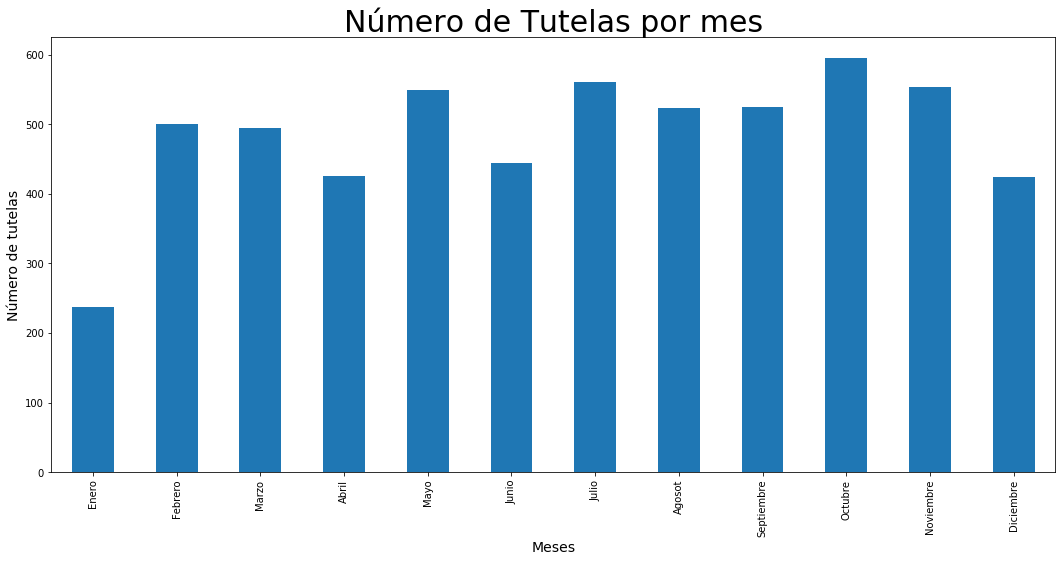

In [88]:
por_mes.plot.bar()
plt.title("Número de Tutelas por mes", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Meses", fontdict={'fontsize': 14})
labels = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosot','Septiembre','Octubre','Noviembre','Diciembre']
plt.xticks(range(12), labels, rotation='vertical');
#plt.savefig('images/bar_month.png')

In [89]:
por_año = Tutelas['Año'].value_counts().sort_index()
por_año

1992     12
1993     24
1994     35
1995     43
1996     43
1997     56
1998     95
1999    153
2000    295
2001    293
2002    279
2003    297
2004    340
2005    424
2006    355
2007    413
2008    459
2009    283
2010    331
2011    242
2012    274
2013    247
2014    238
2015    177
2016    116
2017    133
2018     93
2019     84
Name: Año, dtype: int64

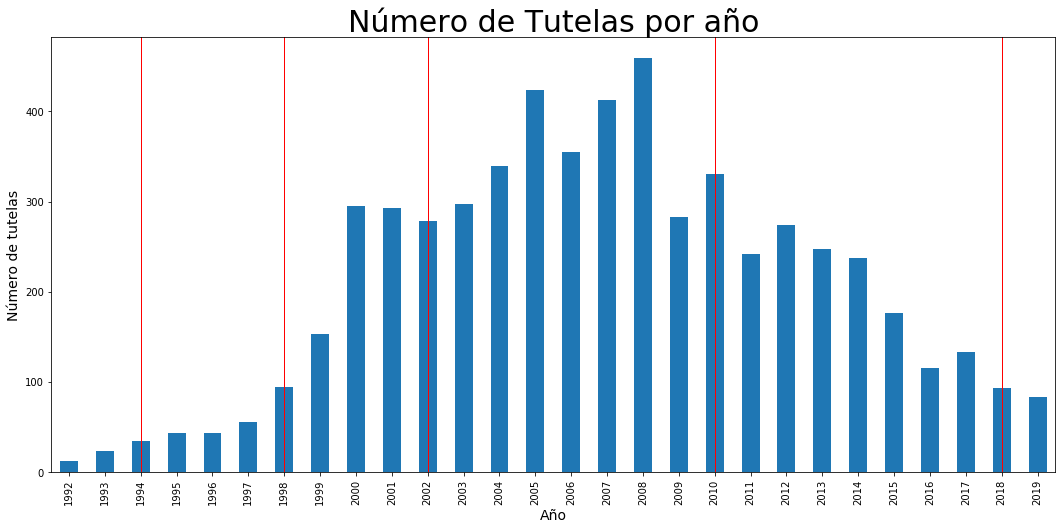

In [158]:
por_año.plot.bar()
plt.title("Número de Tutelas por año", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.axvline(x=2, linewidth=1, color='r');
plt.axvline(x=6, linewidth=1, color='r');
plt.axvline(x=10, linewidth=1, color='r');
plt.axvline(x=18, linewidth=1, color='r');
plt.axvline(x=26, linewidth=1, color='r');
#Tener en cuenta si quiero algo más
#plt.savefig('images/bar_month.png')

In [ ]:
Año_Mes = Tutelas.groupby([Tutelas['Fecha'].dt.year, Tutelas['Fecha'].dt.month])

In [94]:
AñoMes = Año_Mes['Mes'].agg('count')

Text(255, 0.65, 'Santos')

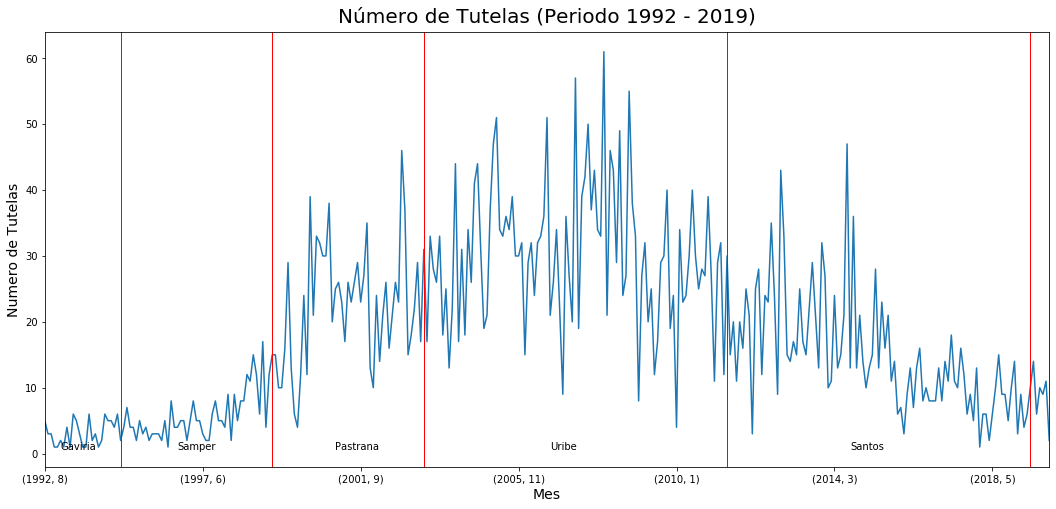

In [157]:
AñoMes.plot()
plt.title("Número de Tutelas (Periodo 1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Numero de Tutelas", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14});
# Cambios de periodo gubernamental
plt.axvline(x=24, linewidth=1, color='r')
plt.axvline(x=72, linewidth=1, color='r')
plt.axvline(x=120, linewidth=1, color='r')
plt.axvline(x=216, linewidth=1, color='r')
plt.axvline(x=312, linewidth=1, color='r');
# Nombres de los presidentes en cada periodo
plt.text(5, 0.65, r'Gaviria')
plt.text(42, 0.65, r'Samper')
plt.text(92, 0.65, r'Pastrana')
plt.text(160, 0.65, r'Uribe')
plt.text(255, 0.65, r'Santos')
#plt.savefig('images/line_month.png')

In [96]:
Magistrado = Tutelas['Magistrado_Ponente'].value_counts()
Magistrado

HUMBERTO ANTONIO SIERRA PORTO      330
JAIME CÓRDOBA TRIVIÑO              319
JAIME ARAUJO RENTERÍA              311
RODRIGO ESCOBAR GIL                307
MARCO GERARDO MONROY CABRA         305
NILSON PINILLA PINILLA             293
CLARA INÉS VARGAS HERNÁNDEZ        293
MANUEL JOSÉ CEPEDA ESPINOSA        285
ALVARO TAFUR GALVIS                267
ALFREDO BELTRÁN SIERRA             256
GABRIEL EDUARDO MENDOZA MARTELO    216
JORGE IGNACIO PRETELT CHALJUB      207
LUIS ERNESTO VARGAS SILVA          196
MAURICIO GONZÁLEZ CUERVO           174
MARÍA VICTORIA CALLE CORREA        162
JORGE IVÁN PALACIO PALACIO         153
ALEJANDRO MARTÍNEZ CABALLERO       148
FABIO MORÓN DÍAZ                   122
JOSÉ GREGORIO HERNÁNDEZ GALINDO    113
EDUARDO MONTEALEGRE LYNETT         112
LUIS GUILLERMO GUERRERO PÉREZ      100
ALBERTO ROJAS RÍOS                  87
CARLOS GAVIRIA DÍAZ                 78
GLORIA STELLA ORTIZ DELGADO         74
JUAN CARLOS HENAO PÉREZ             70
EDUARDO CIFUENTES MUÑOZ  

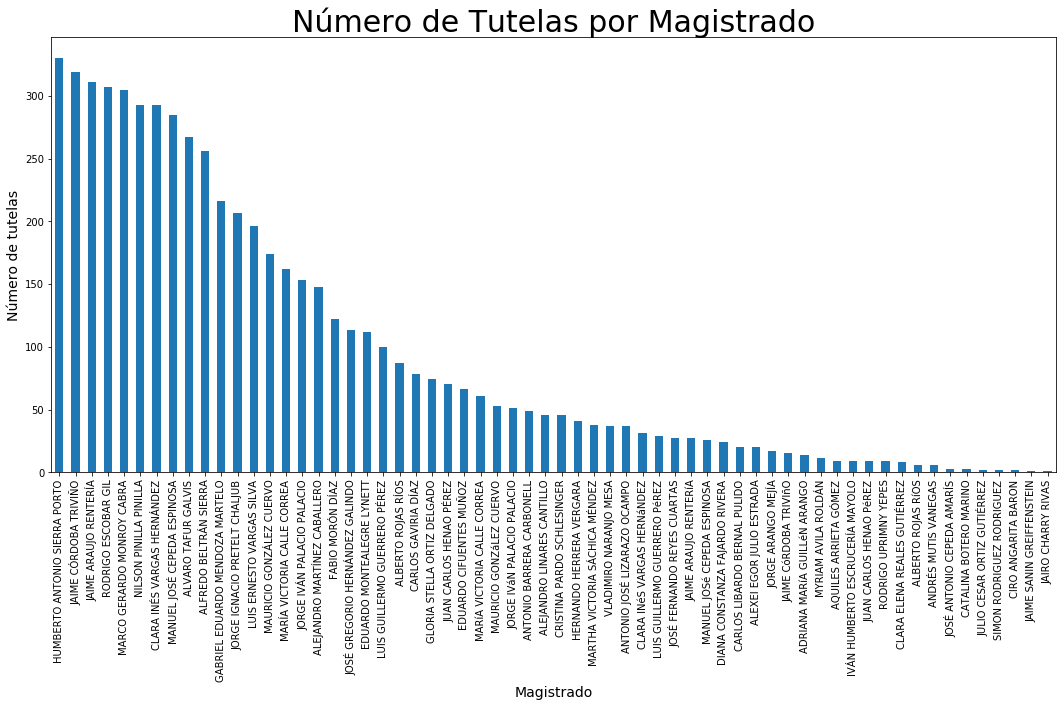

In [97]:
Magistrado.plot.bar()
plt.title("Número de Tutelas por Magistrado", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Magistrado", fontdict={'fontsize': 14});
#plt.savefig('images/bar_month.png')

In [274]:
Demandado = Tutelas['Demandado'].value_counts()
Demandado

                                                                                                  797
 ISS VS                                                                                           233
 SALUDCOOP VS                                                                                     112
 COOMEVA VS                                                                                       108
 COOMEVA EPS                                                                                       88
 NUEVA EPS                                                                                         77
 SALUDCOOP EPS                                                                                     55
 SALUD TOTAL VS                                                                                    50
 SANITAS VS                                                                                        46
 CAFESALUD VS                                                                     

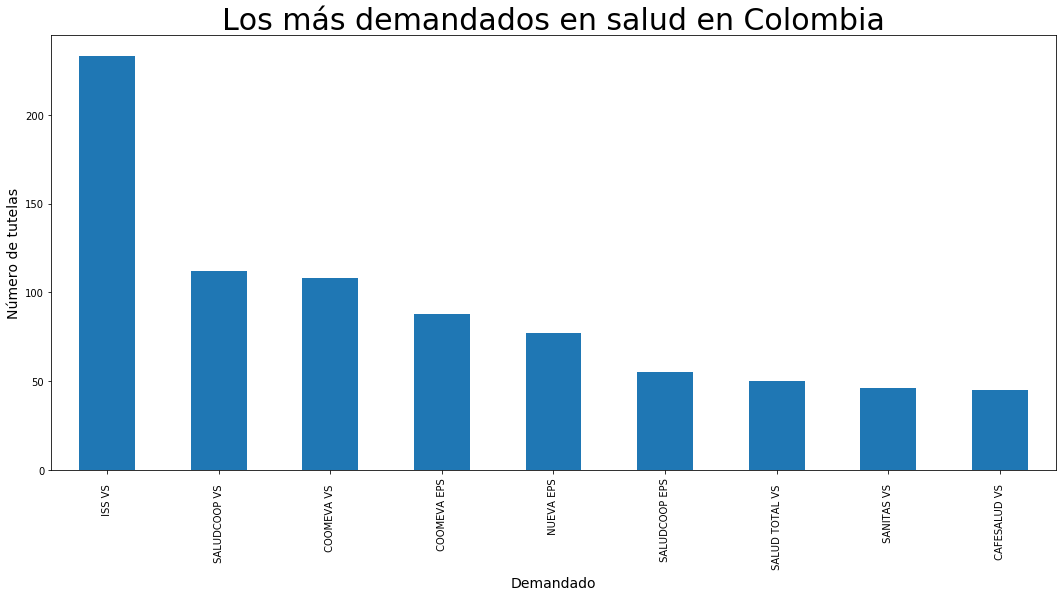

In [281]:
#Los más demandados
Demandado[1:10].plot.bar() #Se coloca desde 1, por en '0' están las demandas sin demandado
plt.title("Los más demandados en salud en Colombia", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Demandado", fontdict={'fontsize': 14});
#plt.savefig('images/bar_month.png')

In [283]:
# Hay demandaditis?
Demandante = Tutelas['Demandante'].value_counts()
Demandante

                                                                                                24
REVISION DE CONSTITUCIONALIDAD                                                                  10
XXX                                                                                              8
JUAN DIEGO BUITRAGO GALINDO                                                                      5
XX                                                                                               5
PEDRO                                                                                            4
AA                                                                                               4
ANDRES EDUARDO DEWDNEY MONTERO                                                                   3
AAA                                                                                              3
FRANCISCO JAVIER GIL GOMEZ                                                                       3
UGPP      

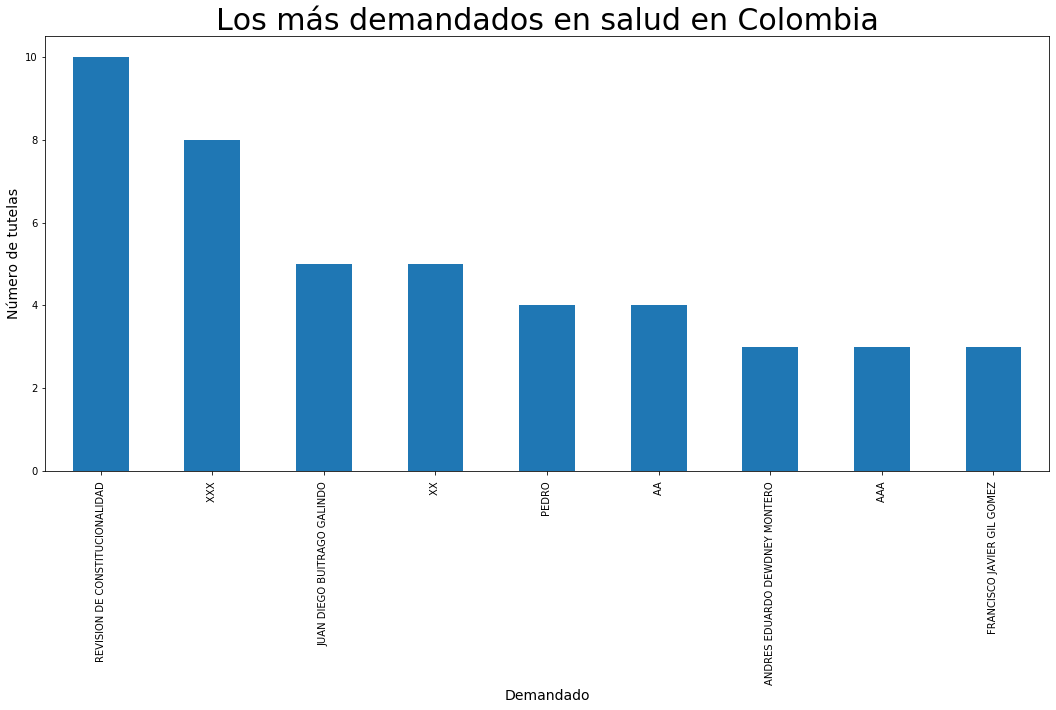

In [284]:
#Los más demandados
Demandante[1:10].plot.bar() #Se coloca desde 1, por en '0' están las demandas sin demandado
plt.title("Los más demandados en salud en Colombia", fontdict={'fontsize': 30})
plt.ylabel("Número de tutelas", fontdict={'fontsize': 14})
plt.xlabel("Demandado", fontdict={'fontsize': 14});
#plt.savefig('images/bar_month.png')

# Uso de conceptos a lo largo del tiempo

In [228]:
def p_counter(lista_de_palabras, palabra):
    counter = Counter(p for p in lista_de_palabras if p in palabra)
    return counter[palabra]

In [ ]:
nltk.FreqDist(all_tokens).most_common()

In [229]:
Tutelas['aborto'] = [p_counter(Tutelas['Tutela_nsw'][i], 'aborto') for i in range(len(Tutelas['Tutela_nsw']))]

In [230]:
Tutelas['eps'] = [p_counter(Tutelas['Tutela_nsw'][i], 'eps') for i in range(len(Tutelas['Tutela_nsw']))]

In [231]:
Tutelas['medicamentos'] = [p_counter(Tutelas['Tutela_nsw'][i], 'medicamentos') for i in range(len(Tutelas['Tutela_nsw']))]

In [232]:
Tutelas['enfermedad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'enfermedad') for i in range(len(Tutelas['Tutela_nsw']))]

In [233]:
Tutelas['vejez'] = [p_counter(Tutelas['Tutela_nsw'][i], 'vejez') for i in range(len(Tutelas['Tutela_nsw']))]

In [234]:
Tutelas['vida'] = [p_counter(Tutelas['Tutela_nsw'][i], 'vida') for i in range(len(Tutelas['Tutela_nsw']))]

In [235]:
Tutelas['seguridad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'seguridad') for i in range(len(Tutelas['Tutela_nsw']))]

In [236]:
Tutelas['pos'] = [p_counter(Tutelas['Tutela_nsw'][i], 'pos') for i in range(len(Tutelas['Tutela_nsw']))]

In [237]:
Tutelas['discapacidad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'discapacidad') for i in range(len(Tutelas['Tutela_nsw']))]

In [238]:
Tutelas['cancer'] = [p_counter(Tutelas['Tutela_nsw'][i], 'cancer') for i in range(len(Tutelas['Tutela_nsw']))]

In [239]:
Tutelas['laboral'] = [p_counter(Tutelas['Tutela_nsw'][i], 'laboral') for i in range(len(Tutelas['Tutela_nsw']))]

In [240]:
Tutelas['salud'] = [p_counter(Tutelas['Tutela_nsw'][i], 'salud') for i in range(len(Tutelas['Tutela_nsw']))]

In [253]:
Tutelas['morir'] = [p_counter(Tutelas['Tutela_nsw'][i], 'morir') for i in range(len(Tutelas['Tutela_nsw']))]

In [260]:
Tutelas['eutanasia'] = [p_counter(Tutelas['Tutela_nsw'][i], 'eutanasia') for i in range(len(Tutelas['Tutela_nsw']))]

In [261]:
Tutelas['digna'] = [p_counter(Tutelas['Tutela_nsw'][i], 'digna') for i in range(len(Tutelas['Tutela_nsw']))]

In [262]:
Tutelas['dignidad'] = [p_counter(Tutelas['Tutela_nsw'][i], 'dignidad') for i in range(len(Tutelas['Tutela_nsw']))]

In [263]:
Tutelas['pañales'] = [p_counter(Tutelas['Tutela_nsw'][i], 'pañales') for i in range(len(Tutelas['Tutela_nsw']))]

In [271]:
Tutelas['embarazo'] = [p_counter(Tutelas['Tutela_nsw'][i], 'embarazo') for i in range(len(Tutelas['Tutela_nsw']))]

In [272]:
aborto_mes = Año_Mes['aborto'].agg('sum')
eps_mes = Año_Mes['eps'].agg('sum')
medicamentos_mes = Año_Mes['medicamentos'].agg('sum')
enfermedad_mes = Año_Mes['enfermedad'].agg('sum')
vejez_mes = Año_Mes['vejez'].agg('sum')
vida_mes = Año_Mes['vida'].agg('sum')
salud_mes = Año_Mes['salud'].agg('sum')
seguridad = Año_Mes['seguridad'].agg('sum')
pos_mes = Año_Mes['pos'].agg('sum')
discapacidad_mes = Año_Mes['discapacidad'].agg('sum')
laboral_mes = Año_Mes['laboral'].agg('sum')
morir_mes = Año_Mes['morir'].agg('sum')
eutanasia_mes = Año_Mes['eutanasia'].agg('sum')
digna_mes = Año_Mes['digna'].agg('sum')
dignidad_mes = Año_Mes['dignidad'].agg('sum')
pañales_mes = Año_Mes['pañales'].agg('sum')
embarazo_mes = Año_Mes['embarazo'].agg('sum')

In [267]:
salud_mes

Fecha  Fecha
1992   8         5
       9         3
       10        3
       12        1
1993   3         1
       4         2
       5         1
       6         4
       8         1
       9         6
       10        5
       11        3
       12        1
1994   1         1
       2         6
       3         2
       4         3
       7         1
       8         2
       9         6
       10        5
       11        5
       12        4
1995   1         6
       2         2
       3         4
       4         7
       5         4
       6         4
       8         2
                ..
2017   6         9
       7        17
       8         7
       9         5
       10        3
       11        3
       12        6
2018   1         1
       2         4
       3         6
       4         1
       5         5
       6         7
       7         6
       8        11
       9         7
       10        0
       11       13
       12       12
2019   1         6
       2         5

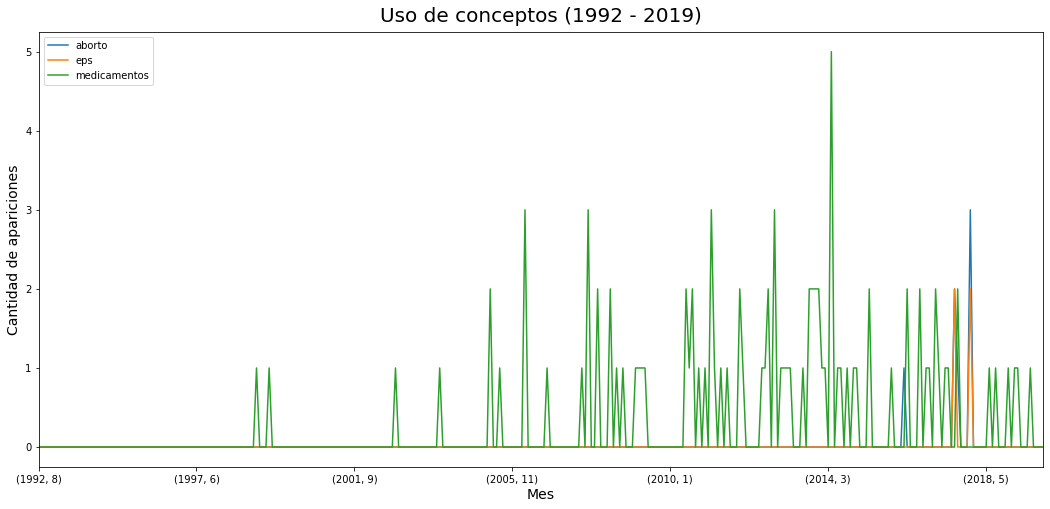

In [270]:
#aborto_mes.plot()
#eps_mes.plot()
#medicamentos_mes.plot()
#enfermedad_mes.plot()
morir_mes.plot()
eutanasia_mes.plot()
pañales_mes.plot()
plt.title("Uso de conceptos (1992 - 2019)", fontdict={'fontsize': 20,'verticalalignment': 'bottom'})
plt.ylabel("Cantidad de apariciones", fontdict={'fontsize': 14})
plt.xlabel("Mes", fontdict={'fontsize': 14})
#labels = month_labels
#plt.xticks(range(68), labels, rotation='vertical')
plt.legend(['aborto','eps','medicamentos', 'enfermedades','morir', 'eutanasia', 'pañales'], loc='upper left');
#plt.savefig('images/key_words1_month.png')